#SuperStore Sales Dataset

Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
df = pd.read_csv('train.csv')

Drive lai mount gareko

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("train.csv")
df_copy=df.copy()

Yo code le upload gareko dataset colab vitra import garxa

#Data Quality Checks and Cleaning

In [ ]:
#Data Quality Checks and Cleaning
print(df.isnull().sum())                          #Checks missing values in df
df_copy=df_copy.dropna(subset=['Postal Code'])    #removes rows where the Postal Code column has missing values.
print(df_copy['Postal Code'].isnull().sum())
df_copy['Postal Code']=df_copy['Postal Code'].astype(int)
print("The duplicated values are:", df.duplicated().sum())

df_copy.drop(columns=['Country'], inplace=True)
df_copy.drop(columns=['Customer ID'], inplace=True)
df_copy.drop(columns=['Product ID'], inplace=True)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
0
The duplicated values are: 0


<ipython-input-6-e4e6a2d9a768>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Postal Code']=df_copy['Postal Code'].astype(int)
<ipython-input-6-e4e6a2d9a768>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns=['Country'], inplace=True)
<ipython-input-6-e4e6a2d9a768>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns=['Customer ID']

Yo code le duplicate ra null values lai handle garxa

In [ ]:
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Shipping Delay,Is Repeat Customer
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2017,8,11,92,True
12,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,Andrew Allen,Consumer,Concord,North Carolina,28027,South,Office Supplies,Paper,Xerox 1967,15.552,2018,4,15,5,True
13,14,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,Irene Maddox,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,2017,5,12,153,True
14,15,US-2016-118983,2016-11-22,2016-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,2016,11,22,4,True
15,16,US-2016-118983,2016-11-22,2016-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,2016,11,22,4,True


#Outlier Detection and Handling

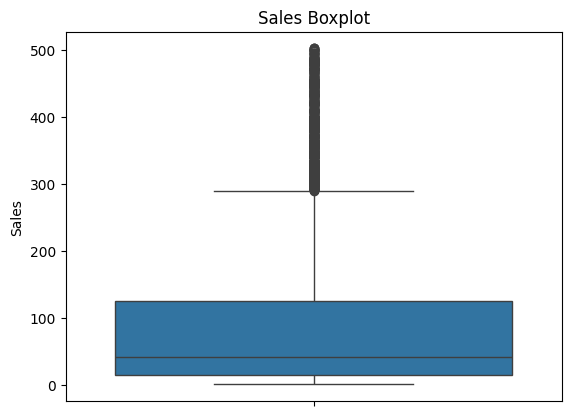

In [ ]:
#Outlier Detection

#Boxplot for sales
sns.boxplot(df_copy['Sales'])
plt.title('Sales Boxplot')
plt.show()

Yo code le box plot bata outliers detect garna help garxa.

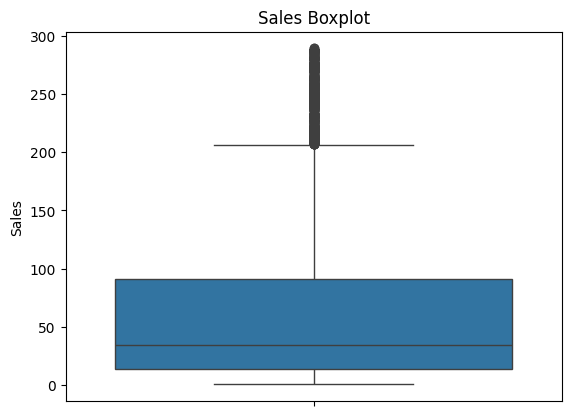

In [ ]:
#Remove outlier using interquartile method
# This part is standard and correctly calculates the
# first quartile, third quartile, and the Interquartile Range.
Q1 = df_copy['Sales'].quantile(0.25)
Q3 = df_copy['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Calculating Lower and Upper Bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy1 = df.copy()    #Creating df_copy and filtering

df_copy1 = df_copy[(df_copy['Sales'] >= lower_bound) & (df_copy['Sales'] <= upper_bound)].copy()

sns.boxplot(df_copy1['Sales'])
plt.title('Sales Boxplot')
plt.show()

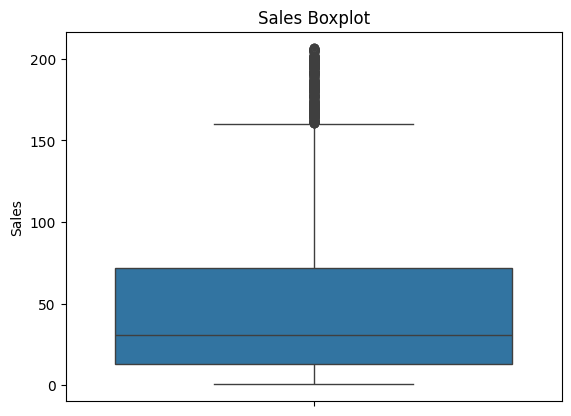

In [ ]:
#Remove outlier using interquartile method
# This part is standard and correctly calculates the
# first quartile, third quartile, and the Interquartile Range.
Q1 = df_copy1['Sales'].quantile(0.25)
Q3 = df_copy1['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Calculating Lower and Upper Bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy2 = df_copy1.copy()    #Creating df_copy and filtering

df_copy2 = df_copy1[(df_copy1['Sales'] >= lower_bound) & (df_copy1['Sales'] <= upper_bound)].copy()

sns.boxplot(df_copy2['Sales'])
plt.title('Sales Boxplot')
plt.show()

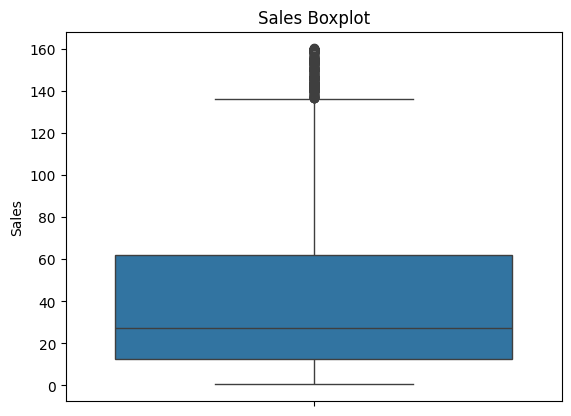

In [ ]:
#Remove outlier using interquartile method
# This part is standard and correctly calculates the
# first quartile, third quartile, and the Interquartile Range.
Q1 = df_copy2['Sales'].quantile(0.25)
Q3 = df_copy2['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Calculating Lower and Upper Bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy3 = df_copy2.copy()    #Creating df_copy and filtering

df_copy3 = df_copy2[(df_copy2['Sales'] >= lower_bound) & (df_copy2['Sales'] <= upper_bound)].copy()

sns.boxplot(df_copy3['Sales'])
plt.title('Sales Boxplot')
plt.show()

#Log Transformation

> Add blockquote



<Axes: ylabel='Sales_log'>

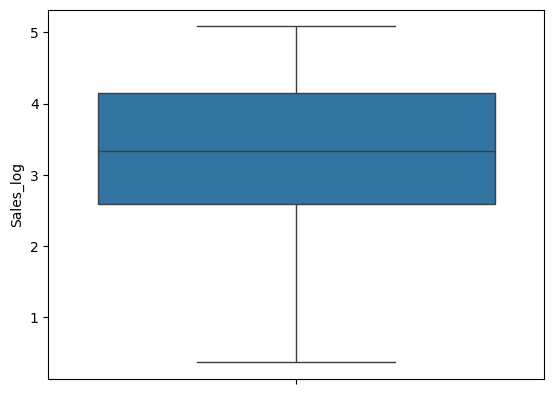

In [ ]:
#log transformation on the 'Sales'
df_copy3['Sales_log'] = np.log1p(df_copy3['Sales'])  # log1p handles zero safely
sns.boxplot(y='Sales_log', data=df_copy3)

**bold text**#Feature Engineering

In [ ]:
#Feature Engineering
df['Order Date']= pd.to_datetime(df['Order Date'], format='mixed')
df['Order Year']= df['Order Date'].dt.year
df['Order Month']= df['Order Date'].dt.month
df['Order Day']= df['Order Date'].dt.day

Yo code le date vanne features bata day month ra year vanne naya feature banauxa

#Shipping Delay Feature

In [ ]:
#Shipping Delay Feature
df['Order Date']=pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='mixed')
df['Shipping Delay']= (df['Ship Date']- df['Order Date']).dt.days
df = df[df['Shipping Delay'] >= 0]
print(df[df['Shipping Delay'] < 0][['Order Date', 'Ship Date', 'Shipping Delay']])


Empty DataFrame
Columns: [Order Date, Ship Date, Shipping Delay]
Index: []


Yo code le order date ra ship date ko features bata shipping delay vanne naya feature banauxa

#Visualization

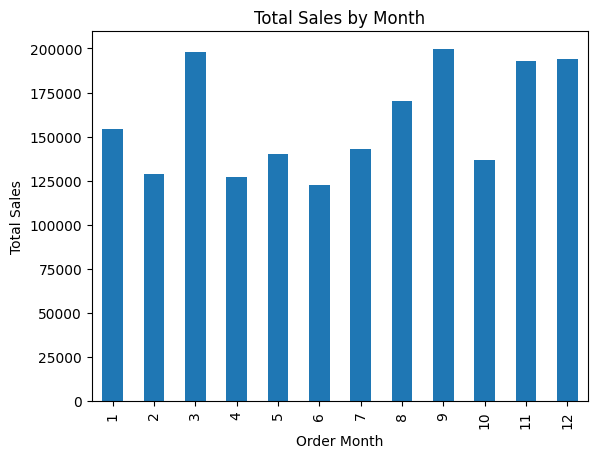

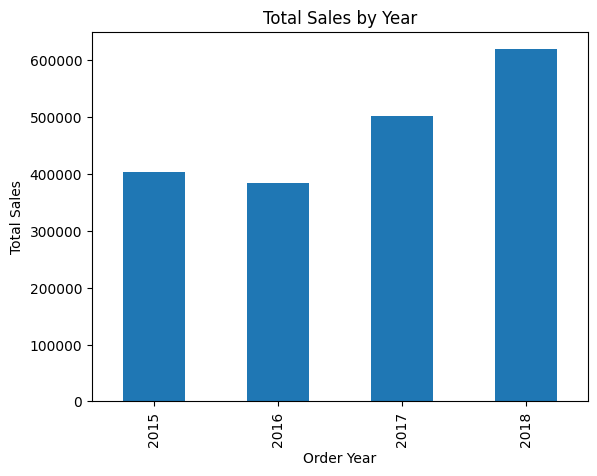

In [ ]:
#Visualization
df.groupby('Order Month')['Sales'].sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()
df.groupby('Order Year')['Sales'].sum().plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

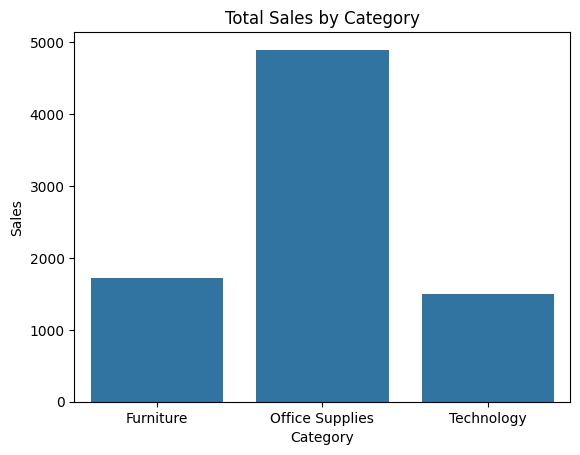

In [ ]:
sns.countplot(x='Category', data=df)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

Profit & Sales scatterplot

In [ ]:
df["Profit"] = df["Sales"] * 0.1  # Assuming 10% profit margin
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Shipping Delay,Is Repeat Customer,Sales_log,Profit
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.960,2017,8,11,92,True,5.568192,26.1960
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,2017,8,11,92,True,6.595699,73.1940
12,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Paper,Xerox 1967,15.552,2018,4,15,5,True,2.744189,1.5552
13,14,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,2017,5,12,153,True,6.011208,40.7976
14,15,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,2016,11,22,4,True,4.231349,6.8810
15,16,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,2016,11,22,4,True,0.933738,0.2544
16,17,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,2015,11,11,7,True,6.501109,66.5880
17,18,CA-2015-167164,2015-05-13,2015-05-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,Storage,Fellowes Super Stor/Drawer,55.500,2015,5,13,2,True,4.016383,5.5500
21,22,CA-2017-137330,2017-09-12,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,Art,Newell 318,19.460,2017,9,12,92,True,2.968361,1.9460
22,23,CA-2017-137330,2017-09-12,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,2017,9,12,92,True,4.099995,6.0340


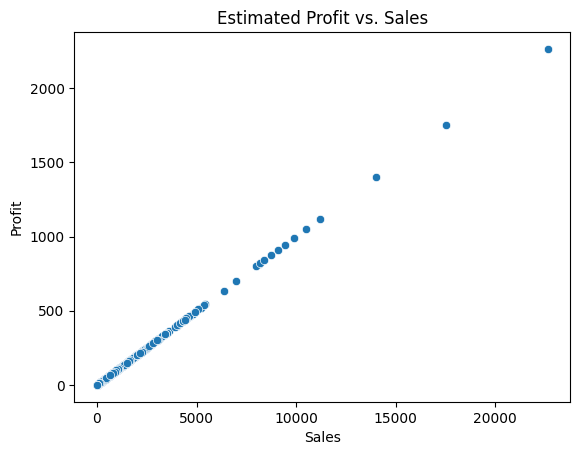

In [ ]:
df["Profit"] = df["Sales"] * 0.1  # Assuming 10% profit margin
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Estimated Profit vs. Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

Correlation Heatmap:

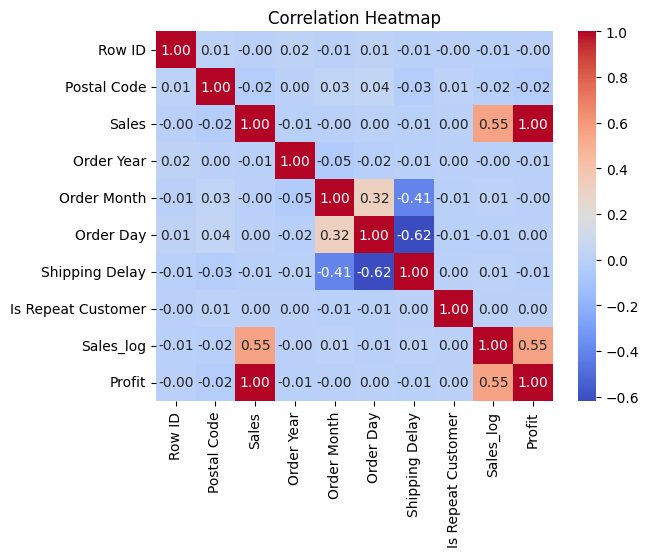

In [ ]:
# Compute the correlation matrix (numeric columns only)
corr= df.corr(numeric_only=True)                          # True=Show correlation values
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') # Format numbers to 2 decimal places
plt.title("Correlation Heatmap")                          #Values close to +1 → –1
plt.show()

Distribution

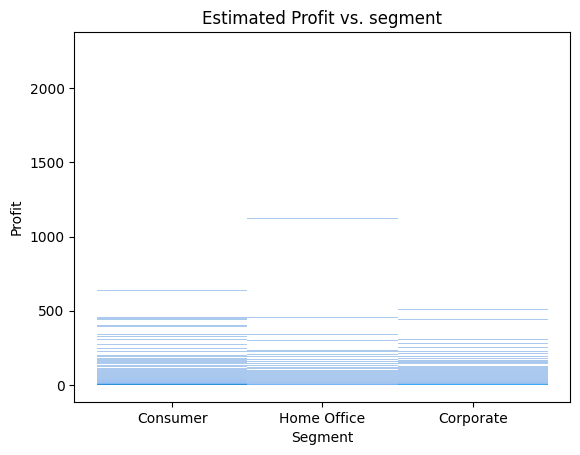

In [ ]:
sns.histplot(x='Segment', y='Profit', data=df)
plt.title("Estimated Profit vs. segment")   #histplot
plt.show()


**Histplot with KDE **

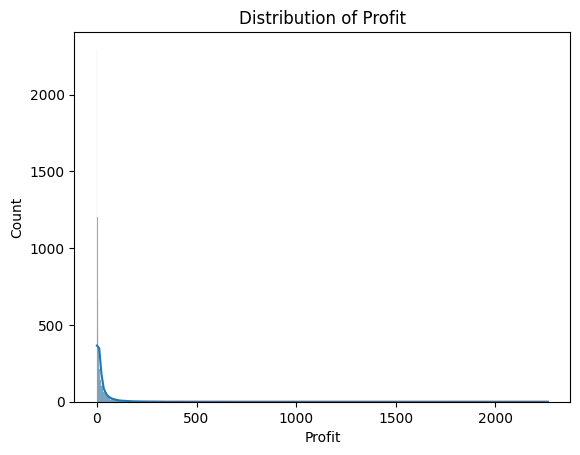

In [ ]:
sns.histplot(df['Profit'],kde=True)
plt.title('Distribution of Profit')   #KDE :smoothed Version
plt.show()

Violin Plot – Combines Distribution & Box Plot

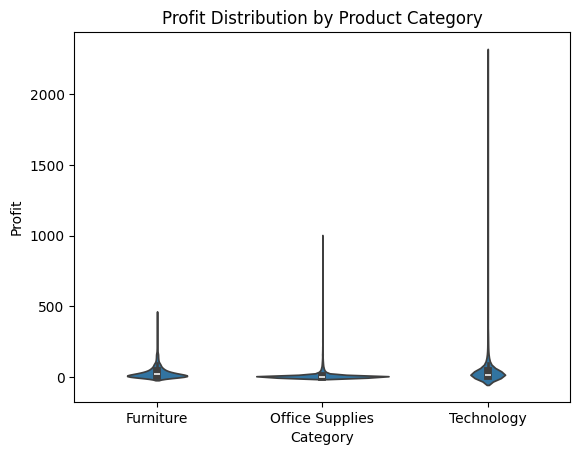

In [ ]:
sns.violinplot(x=df['Category'], y=df['Profit'])
plt.title('Profit Distribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

Top 10 Repeat Customers

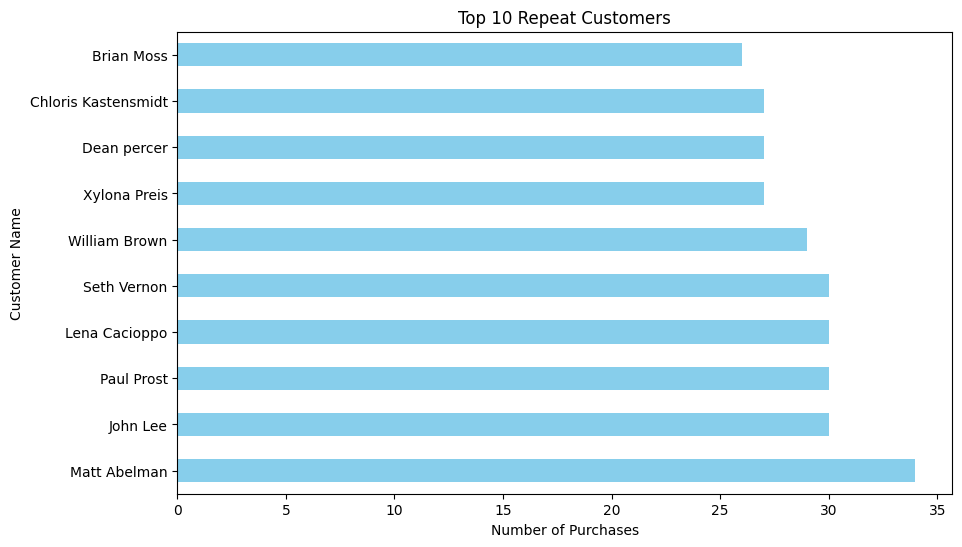

In [ ]:
customer_freq = df['Customer Name'].value_counts()
plt.figure(figsize=(10, 6))
customer_freq.head(10).plot(kind='barh', color='skyblue')
plt.xlabel("Number of Purchases")
plt.ylabel("Customer Name")
plt.title("Top 10 Repeat Customers")
plt.show()

Top 10 Selling Products

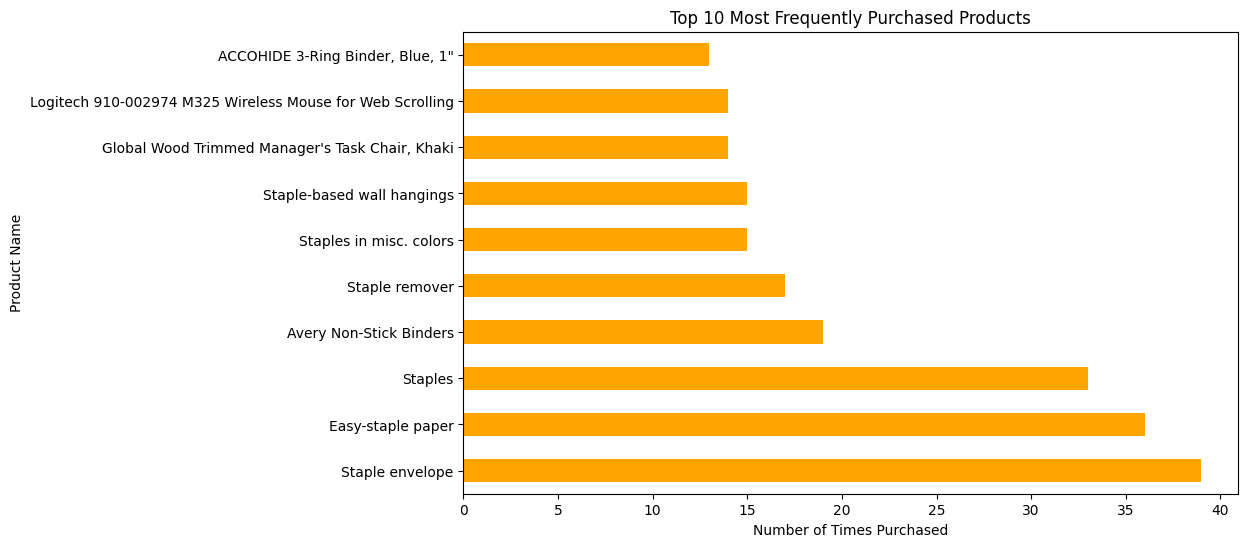

In [ ]:
product_freq = df['Product Name'].value_counts()
plt.figure(figsize=(10, 6))
product_freq.head(10).plot(kind='barh', color='orange')
plt.xlabel("Number of Times Purchased")
plt.ylabel("Product Name")
plt.title("Top 10 Most Frequently Purchased Products")
plt.show()

Sales by State

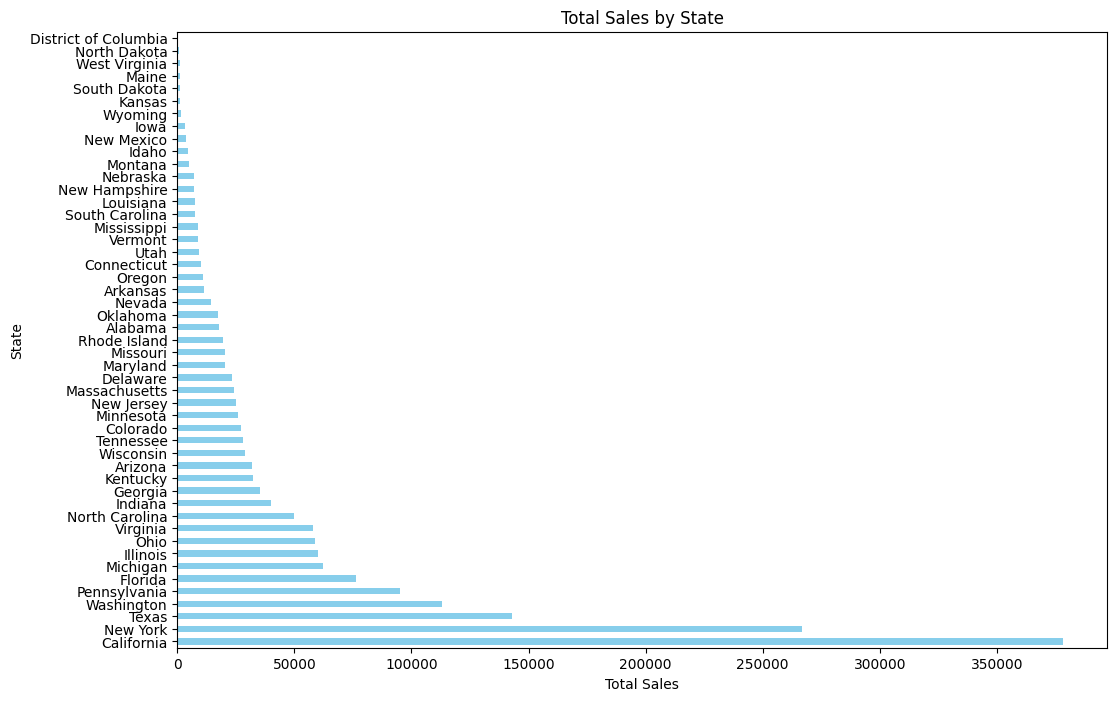

In [ ]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
state_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

Sales by City

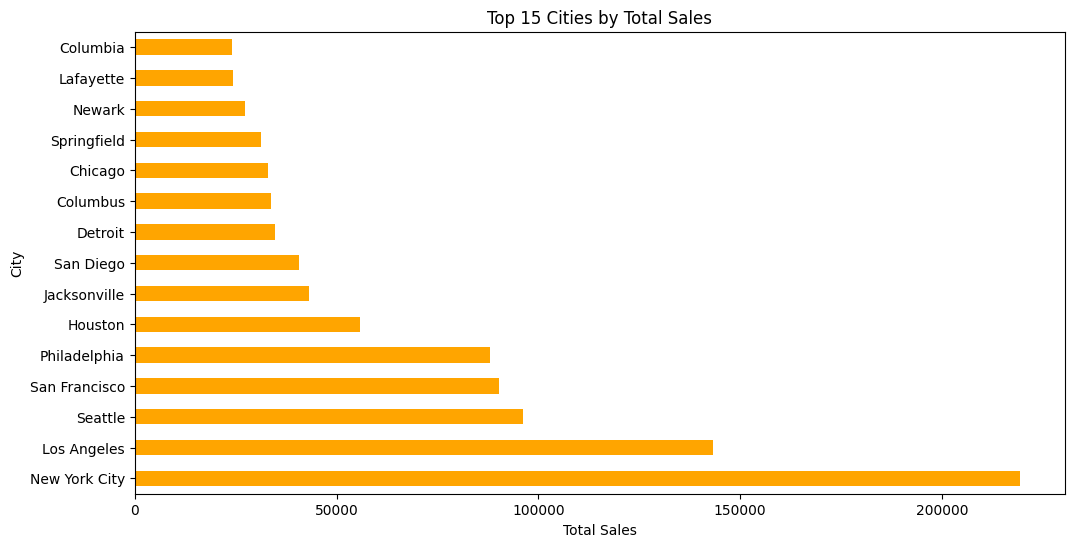

In [ ]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_sales.head(15).plot(kind='barh', color='orange')
plt.title('Top 15 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

Grouped Plot for sub categories within Categories

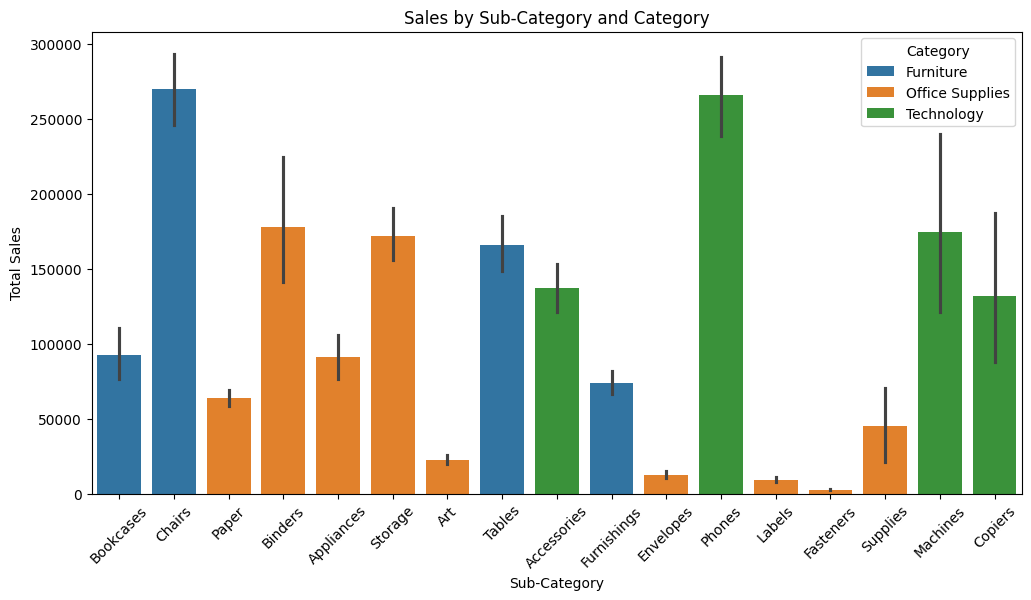

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', hue='Category', data=df, estimator='sum')

plt.title('Sales by Sub-Category and Category')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Sub-Category')
plt.legend(title='Category')
plt.show()

#Engineered Features Visualization

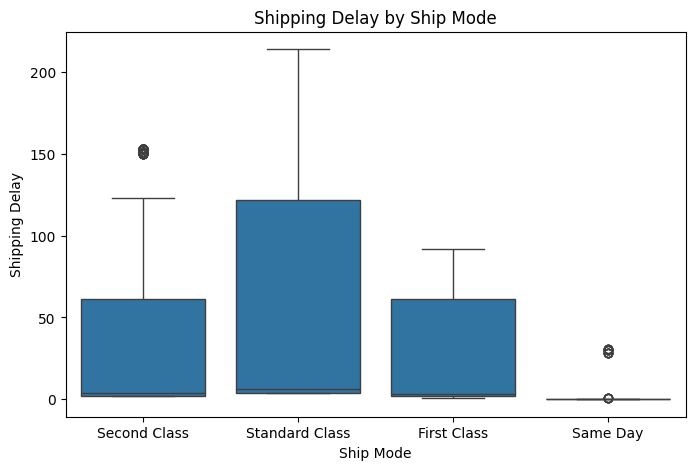

In [ ]:
#Visualization of Shipping mode vs. Shipping Delay
plt.figure(figsize=(8,5))
sns.boxplot(x='Ship Mode', y='Shipping Delay', data=df)
plt.title('Shipping Delay by Ship Mode')
plt.show()

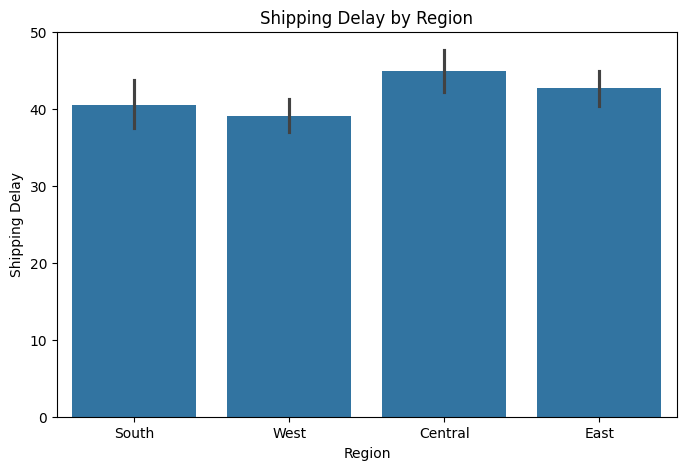

In [ ]:
#Comparing delivery performance region wise
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Shipping Delay', data=df, estimator='mean')
plt.title('Shipping Delay by Region')
plt.show()

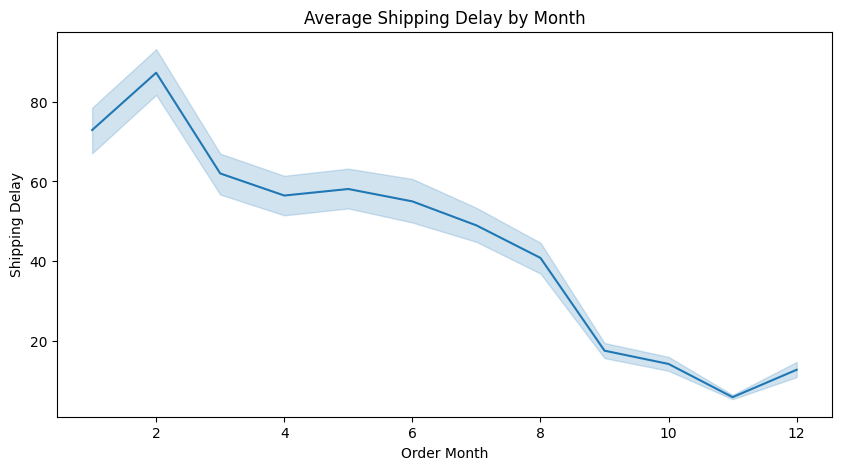

In [ ]:
#Visualizing shipping delays by order month
plt.figure(figsize=(10, 5))
sns.lineplot(x='Order Month', y='Shipping Delay', data=df, estimator='mean')
plt.title('Average Shipping Delay by Month')
plt.show()

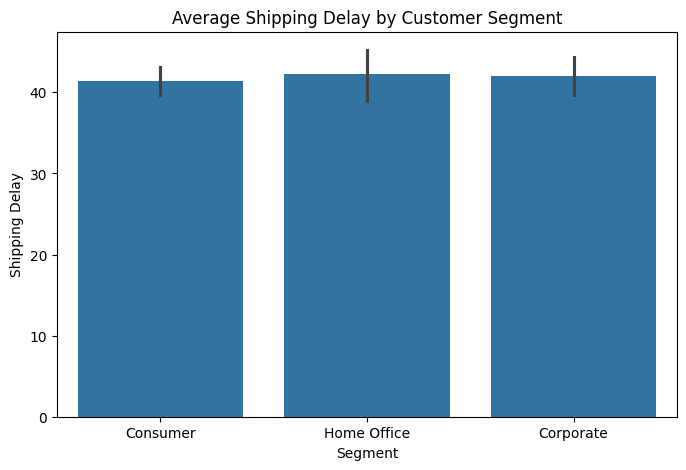

In [ ]:
#Visualizing Shipping Delay by customer segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Shipping Delay', data=df, estimator='mean')
plt.title('Average Shipping Delay by Customer Segment')
plt.show()
